In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.probability import FreqDist
import string
import nltk
from collections import Counter
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

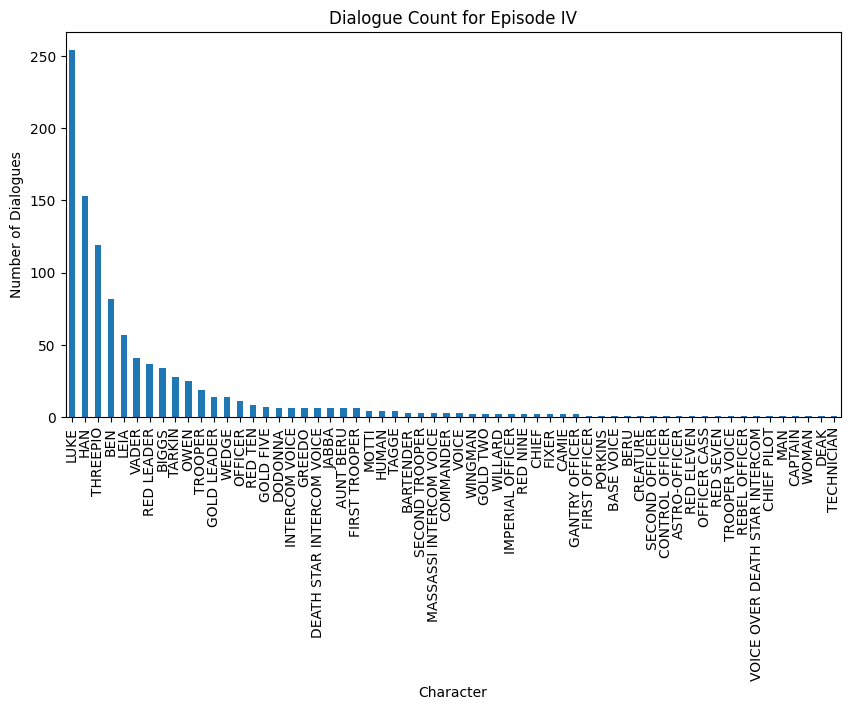

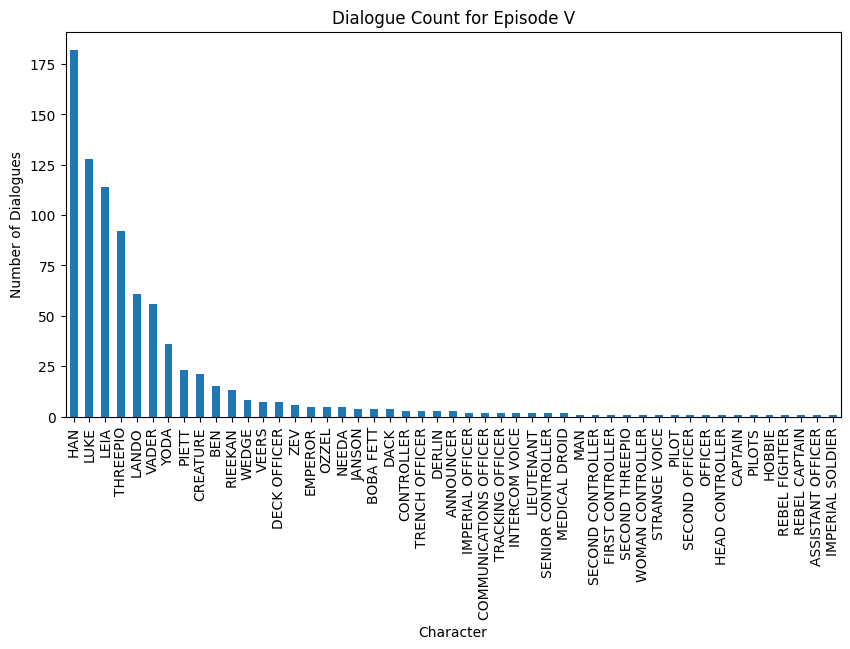

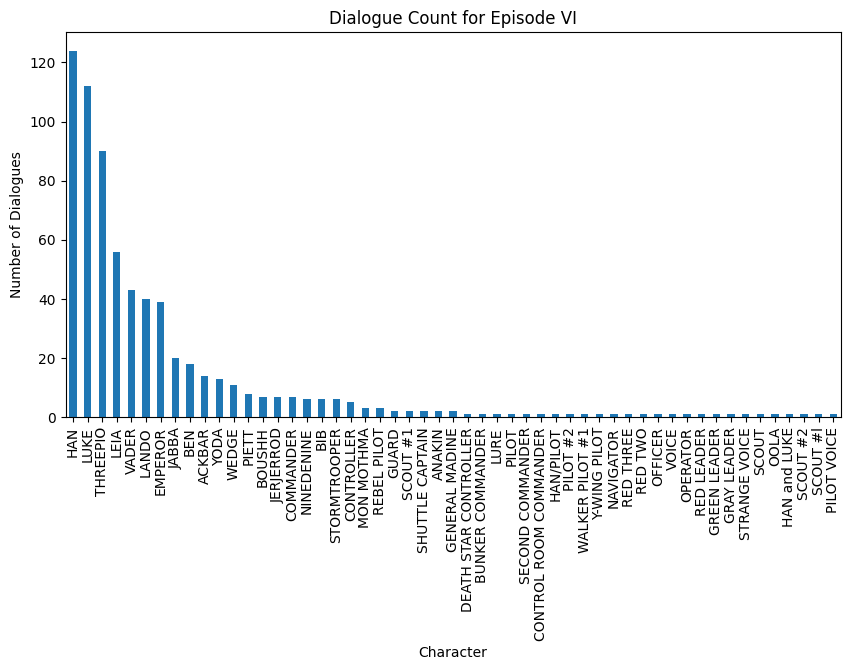

In [14]:
#QUESTION 1 & 2
def load_and_clean_data(filepath):
    data = pd.read_excel(filepath)
    data[['Number', 'Character', 'Dialogue']] = data['Character'].str.extract(r'(\d+)\s+"([^"]+)"\s+"([^"]+)"')
    data.dropna(inplace=True)
    return data

# Load data
episode_iv = load_and_clean_data('C:/Users/yassi/Documents/Business intelligence/LAB_4/star_wars_data_xslx/SW_EpisodeIV.xlsx')
episode_v = load_and_clean_data('C:/Users/yassi/Documents/Business intelligence/LAB_4/star_wars_data_xslx/SW_EpisodeV.xlsx')
episode_vi = load_and_clean_data('C:/Users/yassi/Documents/Business intelligence/LAB_4/star_wars_data_xslx/SW_EpisodeVI.xlsx')

# Plot dialogues
def plot_dialogues(data, episode_title):
    dialogues_count = data['Character'].value_counts()
    dialogues_count.plot(kind='bar', figsize=(10, 5), title=f'Dialogue Count for {episode_title}')
    plt.ylabel('Number of Dialogues')
    plt.show()

plot_dialogues(episode_iv, 'Episode IV')
plot_dialogues(episode_v, 'Episode V')
plot_dialogues(episode_vi, 'Episode VI')

## Most dialogues in each episode:
- **episodes IV : Luke**
- **episodes V : HAN**
- **episodes V : HAN**

In [15]:
#QUESTION 3
#ADD COLUMN 'EPISODE' AND MERGE EVERYTHING
episode_iv['Episode'] = 'Episode IV'
episode_v['Episode'] = 'Episode V'
episode_vi['Episode'] = 'Episode VI'

# Merge 
all_episodes_data = pd.concat([episode_iv, episode_v, episode_vi], ignore_index=True)

# Verify the first rows of the dataset now
#print(all_episodes_data.head())

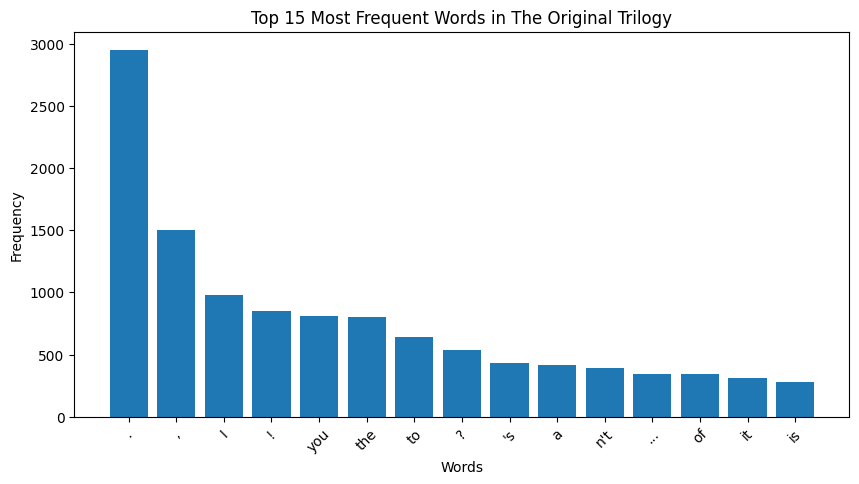

In [16]:
# QUESTION 4
# Tokenize dialogue 
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to all dialogues
all_episodes_data['Tokens'] = all_episodes_data['Dialogue'].apply(tokenize_text)

# Flatten the list of lists into a single list of words
all_words = [word for sublist in all_episodes_data['Tokens'] for word in sublist]

# Calculate the frequency distribution of words
freq_dist = FreqDist(all_words)

# Plot the most common words and their frequency
most_common_words = freq_dist.most_common(15)
words, counts = zip(*most_common_words) 

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words in The Original Trilogy')
plt.xticks(rotation=45)
plt.show()


**Impossible to study the data with every punctuation and stop words** 

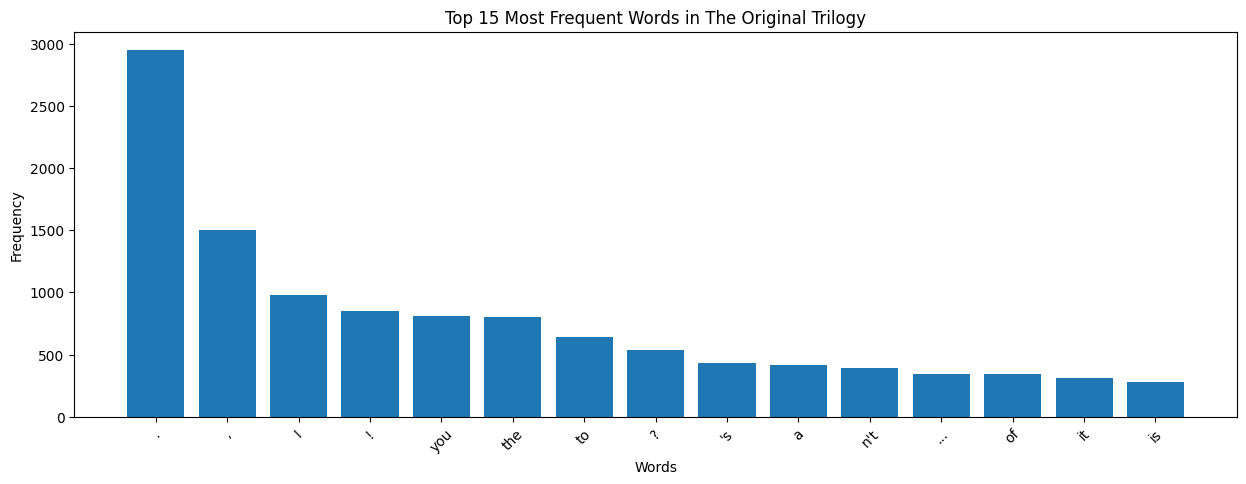

In [17]:
#QUESTION 5
text_data = all_episodes_data['Dialogue'].astype(str)

# Tokenize text data 
def tokenize_text(text):
    return word_tokenize(text) 

# Apply tokenization to each dialogue entry
all_words = [word for text in text_data for word in tokenize_text(text)]
# Calculate frequency distribution
freq_dist = FreqDist(all_words)

# Plot the top 15 most common words
most_common_words = freq_dist.most_common(15)
words, counts = zip(*most_common_words)  

plt.figure(figsize=(15, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words in The Original Trilogy')
plt.xticks(rotation=45)
plt.show()


**Same here impossible to study this DATA too**

In [18]:
# QUESTION 6 : CLEANING DATA 
text_data = all_episodes_data['Dialogue'].astype(str)

# Define stopwords and the lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
#Convert to lower case, word tokenization, removing stopwords, lexic normalization (lemmatization)
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Keep only alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to all dialogues and store in 'new_script'
all_episodes_data['new_script'] = all_episodes_data['Dialogue'].apply(preprocess_text)

#Verify the b°) of question 6
#print(all_episodes_data[['Dialogue', 'new_script']].head())


[('luke', 136), ('get', 130), ('going', 121), ('come', 113), ('right', 113), ('oh', 111), ('know', 110), ('sir', 91), ('well', 91), ('see', 89), ('go', 89), ('u', 83), ('artoo', 81), ('got', 81), ('good', 79)]


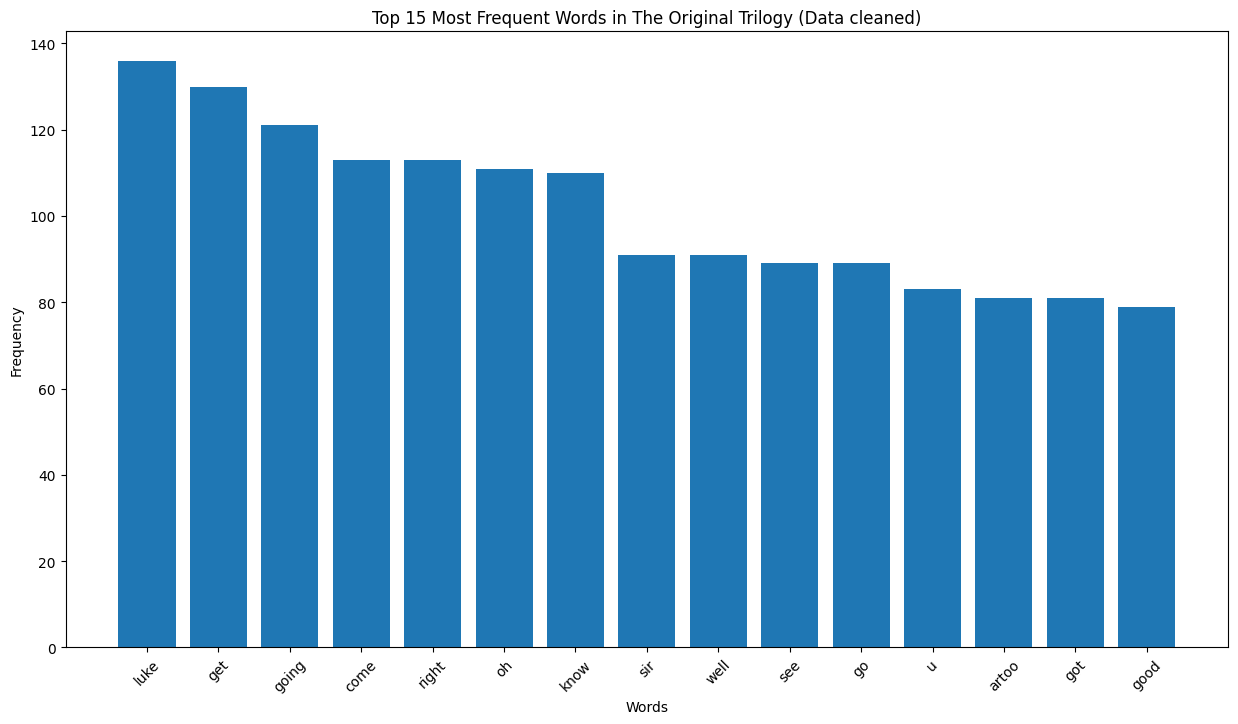

In [19]:
# QUESTION 7: PRINT DATA AFTER PROCESSING
# Trasforme data to single list of words
all_cleaned_words = [word for sublist in all_episodes_data['new_script'] for word in sublist]

# Calculate the frequency distribution of the cleaned words
freq_dist_cleaned = FreqDist(all_cleaned_words)

# Plot the most common words and their frequency
most_common_words = freq_dist_cleaned.most_common(15)
print(most_common_words)
words_cleaned, counts_cleaned = zip(*most_common_words) 

plt.figure(figsize=(15, 8))
plt.bar(words_cleaned, counts_cleaned)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words in The Original Trilogy (Data cleaned)')
plt.xticks(rotation=45)# for visibility
plt.show()


Darth Vader ['transmission', 'intercepted', 'consular', 'ship', 'ambassador', 'commander', 'tear', 'ship', 'apart', 'found', 'plan', 'bring', 'ambassador', 'want', 'alive', 'play', 'game', 'highness', 'mercy', 'mission', 'time', 'passed', 'directly', 'restricted', 'system', 'several', 'transmission', 'beamed', 'ship', 'rebel', 'spy', 'want', 'know', 'happened', 'plan', 'sent', 'part', 'rebel', 'alliance', 'traitor', 'take', 'away', 'traced', 'rebel', 'spy', 'link', 'find', 'secret', 'base', 'leave', 'send', 'distress', 'signal', 'inform', 'senate', 'aboard', 'killed', 'must', 'hidden', 'plan', 'escape', 'pod', 'send', 'detachment', 'retrieve', 'see', 'personally', 'commander', 'one', 'stop', 'u', 'time', 'plan', 'refer', 'soon', 'back', 'hand', 'proud', 'technological', 'terror', 'constructed', 'ability', 'destroy', 'planet', 'insignificant', 'next', 'power', 'force', 'find', 'lack', 'faith', 'disturbing', 'wish', 'highness', 'discus', 'location', 'hidden', 'rebel', 'base', 'resistance

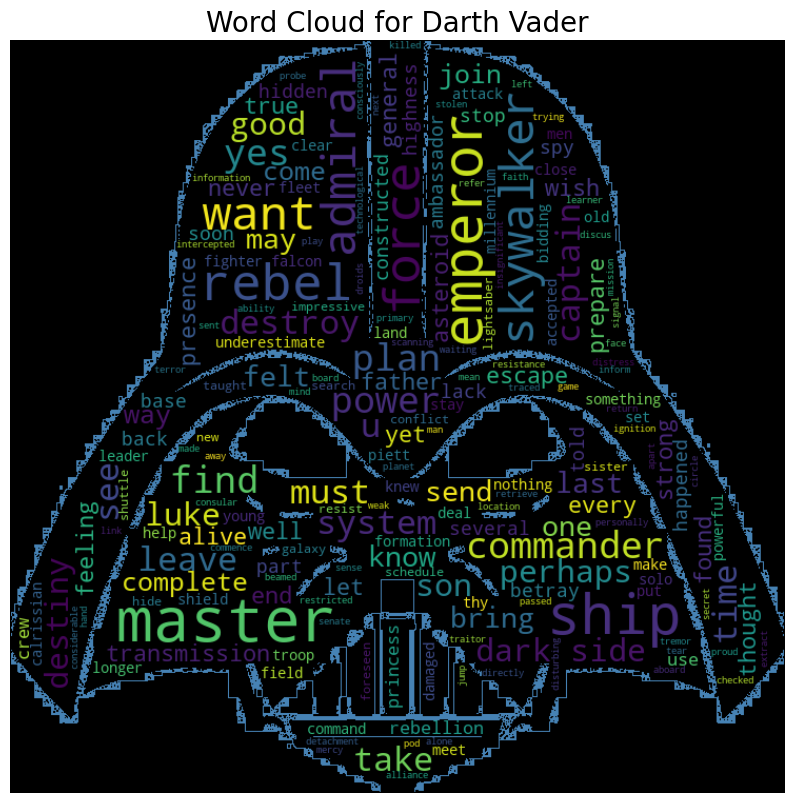

Yoda ['hmmm', 'much', 'anger', 'like', 'father', 'hah', 'ready', 'ready', 'know', 'ready', 'eight', 'hundred', 'year', 'trained', 'jedi', 'counsel', 'keep', 'trained', 'jedi', 'must', 'deepest', 'commitment', 'serious', 'mind', 'one', 'long', 'time', 'watched', 'never', 'mind', 'hmm', 'hmph', 'adventure', 'heh', 'excitement', 'heh', 'jedi', 'craves', 'thing', 'reckless', 'old', 'yes', 'old', 'begin', 'training', 'finished', 'begin', 'oh', 'run', 'yes', 'jedi', 'strength', 'flow', 'force', 'beware', 'dark', 'side', 'anger', 'fear', 'aggression', 'dark', 'side', 'force', 'easily', 'flow', 'quick', 'join', 'fight', 'start', 'dark', 'path', 'forever', 'dominate', 'destiny', 'consume', 'apprentice', 'quicker', 'easier', 'seductive', 'know', 'calm', 'peace', 'passive', 'jedi', 'us', 'force', 'knowledge', 'defense', 'never', 'attack', 'nothing', 'teach', 'today', 'clear', 'mind', 'question', 'mmm', 'mmmmmm', 'place', 'strong', 'dark', 'side', 'force', 'domain', 'evil', 'must', 'go', 'take', '

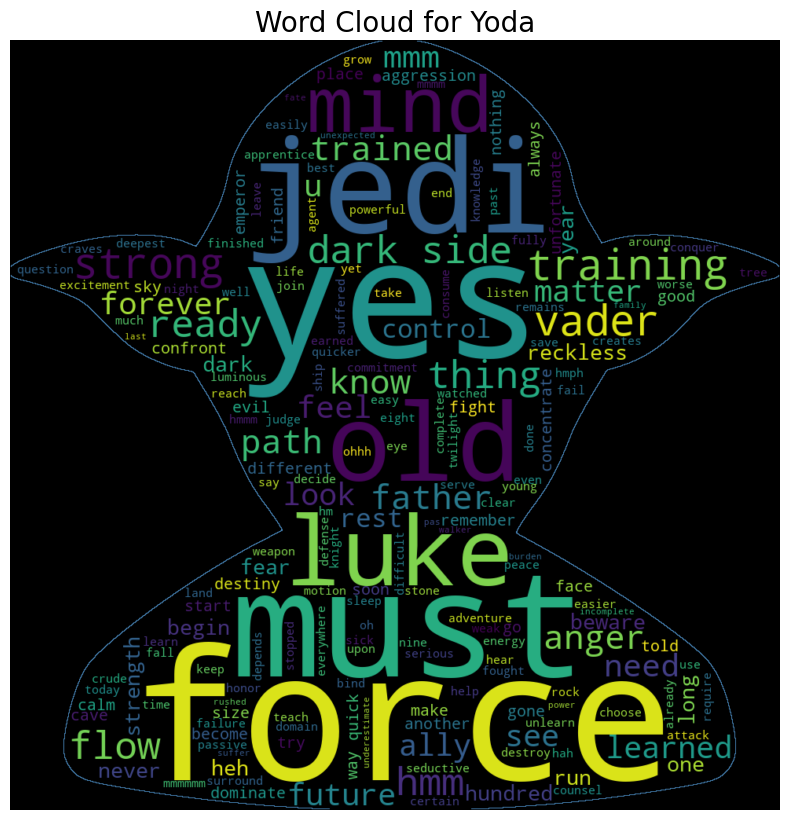

In [20]:
#QUESTION 8: visually represent the most repeated words for Darth Vader and Yoda
from PIL import Image
# Generate a word cloud for a specific character
def generate_word_cloud(character_words, character_name, mask_path):
    # Load the mask image
    char_mask = np.array(Image.open(mask_path))
    wordcloud = WordCloud(width=800, height=400, background_color='black', mask=char_mask, contour_width=1, contour_color='steelblue').generate(' '.join(character_words))
    print(character_name, character_words)
    # Word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {character_name}', size=20)
    plt.axis('off')  # Do not show axes to show in pictures looking good
    plt.show()

# Filter dialogues for Darth Vader and Yoda
darth_vader_words = [word for sublist in all_episodes_data[all_episodes_data['Character'].str.contains("VADER", na=False)]['new_script'] for word in sublist]
yoda_words = [word for sublist in all_episodes_data[all_episodes_data['Character'].str.contains("YODA", na=False)]['new_script'] for word in sublist]

darth_vader_mask = 'C:/Users/yassi/Documents/Business intelligence/LAB_4/wordcloud_masks/vader.jpg'
yoda_mask =  'C:/Users/yassi/Documents/Business intelligence/LAB_4/wordcloud_masks/yoda.png'

# Generate word clouds in Darth Vader and Yoda pictuires
generate_word_cloud(darth_vader_words, "Darth Vader", darth_vader_mask)
generate_word_cloud(yoda_words, "Yoda", yoda_mask)


In [21]:
#QUESTION 9: Usqing model TFIDF to discover most relevant words
# Transform all dialog in a one big text without space
all_episodes_data['combined_script'] = all_episodes_data['new_script'].apply(lambda x: ' '.join(x))

# Initialize the model
vector_model_TFDIF = TfidfVectorizer()
model_TFIDF_matrix = vector_model_TFDIF.fit_transform(all_episodes_data['combined_script'])
feature_names = vector_model_TFDIF.get_feature_names_out()

# Create a DataFrame for the TFIDF values
model_TFIDF = pd.DataFrame(model_TFIDF_matrix.toarray(), columns=feature_names)
# Sum the TFIDF scores 
model_TFIDF_sum = model_TFIDF.sum(axis=0).sort_values(ascending=False)
print(model_TFIDF_sum.head(20))


luke      47.029553
come      45.487753
right     44.398539
going     41.919600
get       39.970877
oh        39.860756
yes       39.651663
know      37.296371
go        34.010027
sir       33.951503
see       33.264047
artoo     32.069652
chewie    30.482065
well      27.558518
got       26.946751
good      26.316882
look      24.586829
back      24.405889
take      24.088250
let       23.172326
dtype: float64


Summary Statistics of Sentimental Analysis:
count    2523.000000
mean        0.039725
std         0.245013
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.053571
max         1.000000
Name: Sentiment, dtype: float64
Median: 0.0
Interquartile Range: 0.05357142857142856


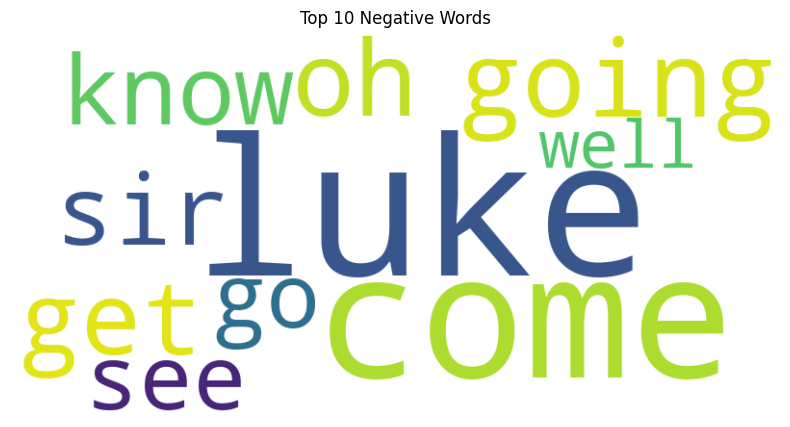

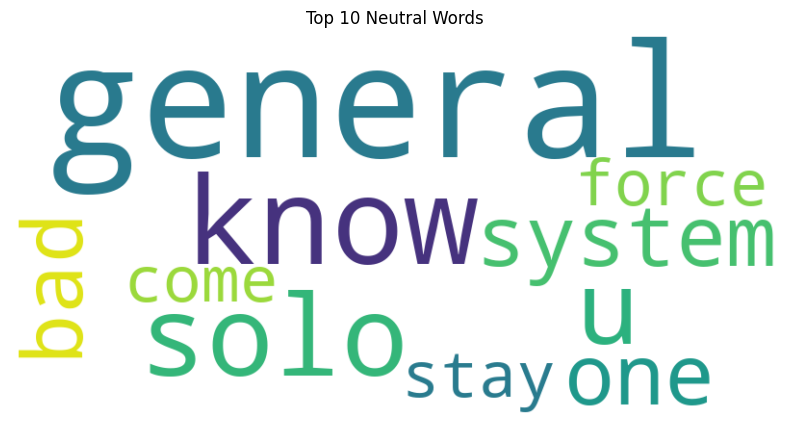

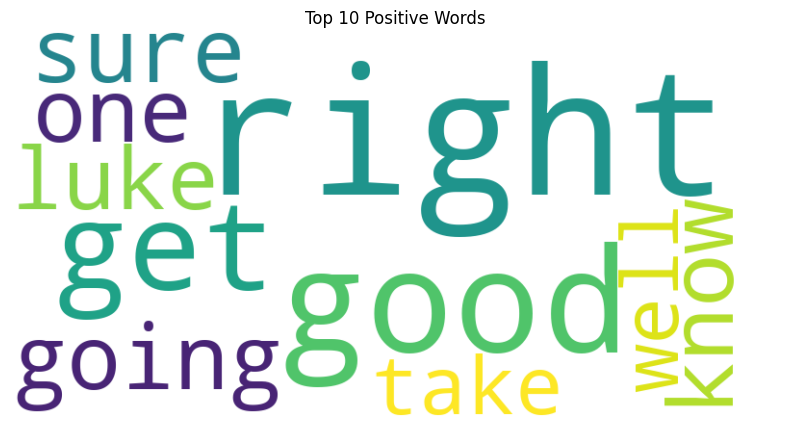

In [22]:
#QUESTION 10:SENTIMENTAL ANALYSIS
# Calculate sentiment scores directly within the DataFrame assignment
all_episodes_data['Sentiment'] = [TextBlob(text).sentiment.polarity for text in all_episodes_data['Dialogue']]

# Print summary statistics of sentiment analysis
print("Summary Statistics of Sentimental Analysis:")
print(all_episodes_data['Sentiment'].describe())

# Print median and interquartile range
median = all_episodes_data['Sentiment'].median()
q1 = all_episodes_data['Sentiment'].quantile(0.25)
q3 = all_episodes_data['Sentiment'].quantile(0.75)
print(f"Median: {median}")
print(f"Interquartile Range: {q3 - q1}")

# Function to get the top words and generate word clouds
def generate_wordcloud_from_data(data, title, num_words=10):
    words = [word for sublist in data['new_script'] for word in sublist]
    word_freq = Counter(words).most_common(num_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud_from_data(all_episodes_data[all_episodes_data['Sentiment'] <= q1], 'Top 10 Negative Words')
generate_wordcloud_from_data(all_episodes_data[(all_episodes_data['Sentiment'] > q1) & (all_episodes_data['Sentiment'] < q3)], 'Top 10 Neutral Words')
generate_wordcloud_from_data(all_episodes_data[all_episodes_data['Sentiment'] >= q3], 'Top 10 Positive Words')


## Summary Statistics conclusion :
The dialogues in Star War’s Original Trilogy predominantly maintain an emotionless tone that mostly leans to the positive, an approach that shows a desire for a balanced presentation of a narrative lacking marked emotional expressions on screen.

Nevertheless, extremes of both negativity and positivity signal to an audience high moments of this series.

## Word Cloud Analysis Conclusion:

- **Dynamic Script**: The presence of action words across all sentiments indicates a dynamic script.
- **Central Character**: "Luke" appears across positiv and negative categories, highlighting his pivotal role.
- **Narrative Balance**: Neutral terminology often relates more to scene-setting and narrative exposition, indicating a well-balanced script.
